# **Библиотека BeautifulSoup**

In [1]:
!pip install beautifulsoup4 -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from bs4 import BeautifulSoup # подключение библиотеки

In [3]:
html_doc = """
  <html>
  <h2 style="padding-left: 180px;">
  <strong>Заголовок</strong>
  </h2>
  <p>
  <a href="https://itmo.ru/?ysclid=lbyuch9pd5418300167"> Ссылка </a>
  </p>
  <ul>
  <li><span style="color: orange;">Оранжевый</span></li>
  <li><span style="color: green; font-size: xx-large;">Зелёный</span></li>
  <li><span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span></li>
  </ul></html>"""

In [4]:
print(html_doc)


  <html>
  <h2 style="padding-left: 180px;">
  <strong>Заголовок</strong>
  </h2>
  <p>
  <a href="https://itmo.ru/?ysclid=lbyuch9pd5418300167"> Ссылка </a>
  </p>
  <ul>
  <li><span style="color: orange;">Оранжевый</span></li>
  <li><span style="color: green; font-size: xx-large;">Зелёный</span></li>
  <li><span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span></li>
  </ul></html>


In [5]:
page = BeautifulSoup(html_doc, features='html.parser')

## .previous_siblings (.previous_sibling) и .next_siblings (.next_sibling)

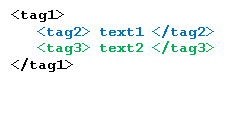

In [6]:
html_siblings = [e for e in page.p.previous_siblings if e.name is not None]
print(html_siblings)

[<h2 style="padding-left: 180px;">
<strong>Заголовок</strong>
</h2>]


In [7]:
html_siblings = [e for e in page.p.next_siblings if e.name is not None]
print(html_siblings)

[<ul>
<li><span style="color: orange;">Оранжевый</span></li>
<li><span style="color: green; font-size: xx-large;">Зелёный</span></li>
<li><span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span></li>
</ul>]


## CSS селекторы

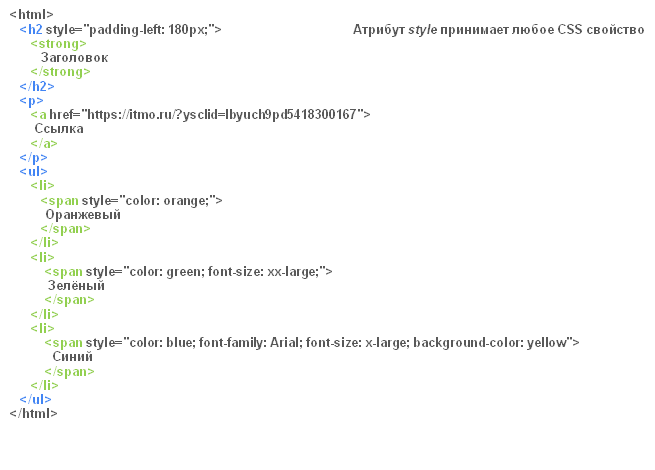

test.css файл
```
* {
    color: yellow;
}
```

K HTML документу его можно подключить с помощью тега <link>:
```
<head>
<link> rel="stylesheet" href="test.css">
</head>
```

In [8]:
page.select('li')

[<li><span style="color: orange;">Оранжевый</span></li>,
 <li><span style="color: green; font-size: xx-large;">Зелёный</span></li>,
 <li><span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span></li>]

In [9]:
page.select_one('li')

<li><span style="color: orange;">Оранжевый</span></li>

In [10]:
page.select('[href]')  # поиск по атрибуту

[<a href="https://itmo.ru/?ysclid=lbyuch9pd5418300167"> Ссылка </a>]

In [11]:
page.select('strong, a')

[<strong>Заголовок</strong>,
 <a href="https://itmo.ru/?ysclid=lbyuch9pd5418300167"> Ссылка </a>]

In [12]:
page.select('ul span')

[<span style="color: orange;">Оранжевый</span>,
 <span style="color: green; font-size: xx-large;">Зелёный</span>,
 <span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span>]

In [13]:
page.select('*:not(html, ul, li,span)')

[<h2 style="padding-left: 180px;">
 <strong>Заголовок</strong>
 </h2>,
 <strong>Заголовок</strong>,
 <p>
 <a href="https://itmo.ru/?ysclid=lbyuch9pd5418300167"> Ссылка </a>
 </p>,
 <a href="https://itmo.ru/?ysclid=lbyuch9pd5418300167"> Ссылка </a>]

In [14]:
print(page.select("li:nth-of-type(1)"))
print(page.select("li:nth-of-type(2)"))
print(page.select("li:nth-of-type(3)"))

[<li><span style="color: orange;">Оранжевый</span></li>]
[<li><span style="color: green; font-size: xx-large;">Зелёный</span></li>]
[<li><span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span></li>]


In [15]:
print(page.select("li:nth-of-type(-n+2)"))  # n = 0,1,...

[<li><span style="color: orange;">Оранжевый</span></li>, <li><span style="color: green; font-size: xx-large;">Зелёный</span></li>]


In [16]:
print(page.select("li:nth-of-type(odd)"))

[<li><span style="color: orange;">Оранжевый</span></li>, <li><span style="color: blue; font-family: Arial; font-size: x-large; background-color: yellow">Синий</span></li>]


In [17]:
page.select('strong:only-child') # элемент не имеет одноуровневых элементов, является единственным дочерним элементом.

[<strong>Заголовок</strong>]